<a href="https://colab.research.google.com/github/marrs-lab/drone_ocean_color/blob/master/landsat8_aquatic_ref_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Processing Landsat 8 Imagery into Chlorophyll-a

This follows the NASA ATBD and processes L8 imagery into chl-a. Ideally this will be applied to the (provisional) Aquatic Reflectance Product USGS has recently released: 

https://www.usgs.gov/core-science-systems/nli/landsat/landsat-provisional-aquatic-reflectance



In [1]:
## load the imagery in via rasterio

# reshape to a vector for each image

# run the l2_chlor algorithm on each pixel

# reshape back to an image

# plot the img

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

In [5]:
pip install rasterio

     |████████████████████████████████| 19.3 MB 318 kB/s 


Pull in all the imagery via xarray's rasterio module

In [6]:
band1 = xr.open_rasterio('LC08_CU_029011_20200309_20210504_02_SR_B1.TIF')#.isel(band=0,y=slice(500,3000),x=slice(1000,4800))
band1

<xarray.DataArray (band: 1, y: 5000, x: 5000)>
[25000000 values with dtype=uint16]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 1.665e+06 1.665e+06 1.665e+06 ... 1.515e+06 1.515e+06
  * x        (x) float64 1.784e+06 1.784e+06 1.784e+06 ... 1.934e+06 1.934e+06
Attributes:
    transform:      (30.0, 0.0, 1784415.0, 0.0, -30.0, 1664805.0)
    crs:            +proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x...
    res:            (30.0, 30.0)
    is_tiled:       1
    nodatavals:     (0.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Point

In [10]:

band1.mean()

<xarray.DataArray ()>
array(7233.39060252)

In [8]:

band1.min()

<xarray.DataArray ()>
array(0, dtype=uint16)

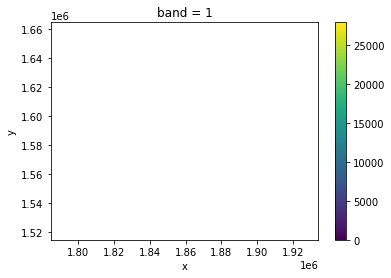

In [7]:

band1.plot()

In [ ]:
band1 = xr.open_rasterio('LC08_CU_029011_20200309_20210504_02_SR_B1.TIF').isel(band=0,y=slice(500,3000),x=slice(1000,4800))
band2 = xr.open_rasterio('LC08_CU_029011_20200309_20210504_02_SR_B1.TIF').isel(band=0,y=slice(500,3000),x=slice(1000,4800))
band3 = xr.open_rasterio('LC08_CU_029011_20200309_20210504_02_SR_B1.TIF').isel(band=0,y=slice(500,3000),x=slice(1000,4800))
band4 = xr.open_rasterio('LC08_CU_029011_20200309_20210504_02_SR_B1.TIF').isel(band=0,y=slice(500,3000),x=slice(1000,4800))
therm = xr.open_rasterio('LC08_L2SP_013036_20200309_20200822_02_T1_ST_B10.TIF').isel(band=0,y=slice(500,3000),x=slice(1000,4800))

In [ ]:
band1 = band1.where(band1 != -9999)
band2 = band2.where(band2 != -9999)
band3 = band3.where(band3 != -9999)
band4 = band4.where(band4 != -9999)
therm = therm.where(therm != 0)

In [9]:
band1 = xr.open_rasterio('LC08_L1TP_013035_20200309_20200314_01_T1_ar_band1.tif')
band1 = band1.where(band1 != -9999)

In [27]:
band1 = xr.open_rasterio('LC08_L1TP_013035_20200309_20200314_01_T1_ar_band1.tif')#.isel(band=0,y=slice(500,3000),x=slice(1000,4800))
band2 = xr.open_rasterio('LC08_L1TP_013035_20200309_20200314_01_T1_ar_band2.tif')#.isel(band=0,y=slice(500,3000),x=slice(1000,4800))
band3 = xr.open_rasterio('LC08_L1TP_013035_20200309_20200314_01_T1_ar_band3.tif')#.isel(band=0,y=slice(500,3000),x=slice(1000,4800))
band4 = xr.open_rasterio('LC08_L1TP_013035_20200309_20200314_01_T1_ar_band4.tif')#.isel(band=0,y=slice(500,3000),x=slice(1000,4800))
# therm = xr.open_rasterio('LC08_L2SP_013036_20200309_20200822_02_T1_ST_B10.TIF').isel(band=0,y=slice(500,3000),x=slice(1000,4800))

In [28]:
band1 = band1.where(band1 != -9999)
band2 = band2.where(band2 != -9999)
band3 = band3.where(band3 != -9999)
band4 = band4.where(band4 != -9999)
# therm = therm.where(therm != 0)

In [ ]:
band1 = xr.open_rasterio('LC08_L1TP_013036_20200309_20200314_01_T2_ar_band1.tif').isel(band=0,y=slice(500,3000),x=slice(1000,4800))
band2 = xr.open_rasterio('LC08_L1TP_013036_20200309_20200314_01_T2_ar_band2.tif').isel(band=0,y=slice(500,3000),x=slice(1000,4800))
band3 = xr.open_rasterio('LC08_L1TP_013036_20200309_20200314_01_T2_ar_band3.tif').isel(band=0,y=slice(500,3000),x=slice(1000,4800))
band4 = xr.open_rasterio('LC08_L1TP_013036_20200309_20200314_01_T2_ar_band4.tif').isel(band=0,y=slice(500,3000),x=slice(1000,4800))
therm = xr.open_rasterio('LC08_L2SP_013036_20200309_20200822_02_T1_ST_B10.TIF').isel(band=0,y=slice(500,3000),x=slice(1000,4800))

band1 = band1.where(band1 != -9999)
band2 = band2.where(band2 != -9999)
band3 = band3.where(band3 != -9999)
band4 = band4.where(band4 != -9999)
therm = therm.where(therm != 0)

Reflectance is scaled by 0.00001

(array([5.4858000e+04, 1.6595197e+07, 1.8707992e+07, 2.6321670e+06,
        1.0318510e+06, 7.2601000e+05, 2.0120500e+05, 2.1970000e+03,
        1.4000000e+02, 1.3900000e+02]),
 array([   0. ,  628.3, 1256.6, 1884.9, 2513.2, 3141.5, 3769.8, 4398.1,
        5026.4, 5654.7, 6283. ]),
 <a list of 10 Patch objects>)

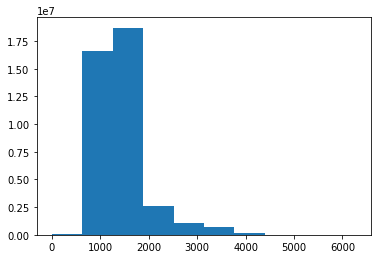

In [10]:
plt.hist(band1.values.flatten())

(array([2.0991000e+04, 1.9525437e+07, 1.1592497e+07, 4.4080680e+06,
        2.0349080e+06, 9.4928900e+05, 6.4635400e+05, 6.0890600e+05,
        1.6298000e+05, 2.3260000e+03]),
 array([   0. ,  628.3, 1256.6, 1884.9, 2513.2, 3141.5, 3769.8, 4398.1,
        5026.4, 5654.7, 6283. ]),
 <a list of 10 Patch objects>)

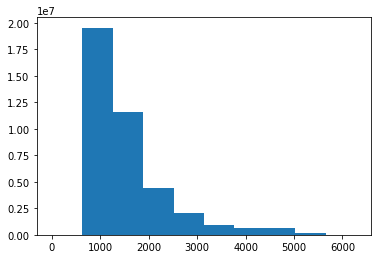

In [29]:
plt.hist(band2.values.flatten())

(array([23792301.,  5222435.,  4117599.,  2156016.,  1165502.,   774157.,
          516321.,   638266.,   796707.,   772452.]),
 array([   0. ,  628.3, 1256.6, 1884.9, 2513.2, 3141.5, 3769.8, 4398.1,
        5026.4, 5654.7, 6283. ]),
 <a list of 10 Patch objects>)

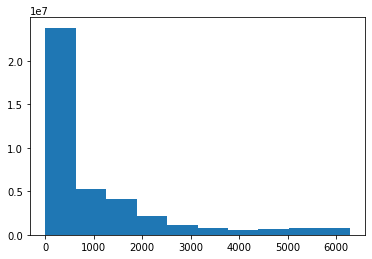

In [31]:

plt.hist(band3.values.flatten())

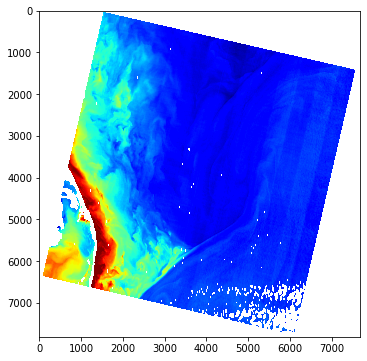

In [30]:
fig,ax=plt.subplots(figsize=(16,6))
ax.imshow(band2.values[0],vmin=500, vmax=5000, cmap='jet')

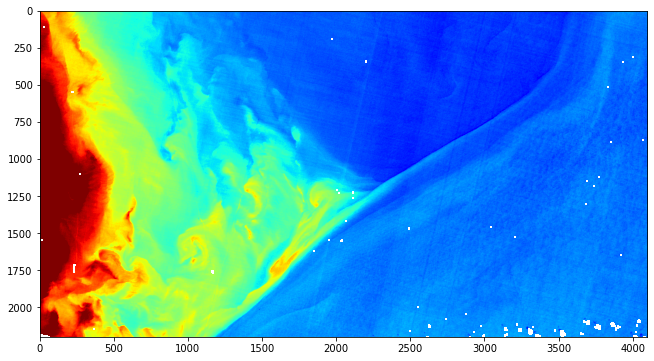

In [34]:
fig,ax=plt.subplots(figsize=(16,6))
ax.imshow(band2.values[0,4500:6700,1400:5500],vmin=200, vmax=4500, cmap='jet')

In [39]:
np.nanmedian((band2.values[0,4500:6700,1400:5500]/band3.values[0,4500:6700,1400:5500]))

2.1894273127753303

(array([2.904915e+06, 2.457270e+06, 7.397320e+05, 2.111036e+06,
        8.034220e+05, 1.880000e+02, 9.100000e+01, 2.800000e+01,
        6.000000e+00, 2.000000e+00]),
 array([0.06138614, 0.31320671, 0.56502728, 0.81684785, 1.06866842,
        1.32048899, 1.57230956, 1.82413013, 2.0759507 , 2.32777127,
        2.57959184]),
 <a list of 10 Patch objects>)

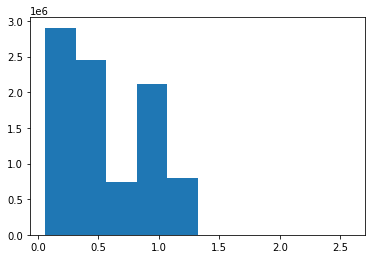

In [41]:
plt.hist((band3.values[0,4500:6700,1400:5500]/band2.values[0,4500:6700,1400:5500]).flatten())

In [45]:
ci1 = -0.49
ci2 = 191.6590

def oc_index(blue, green, red):
    CI = green - ( blue + (555 - 477)/(667 - 477) * (red - blue) )
    ChlCI = 10**(ci1 + ci2*CI)
    return(ChlCI)

In [47]:
oci_map = oc_index(band2.values[0,4500:6700,1400:5500],band3.values[0,4500:6700,1400:5500],band4.values[0,4500:6700,1400:5500])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


In [50]:
oci_map

array([[inf, inf, inf, ...,  0.,  0.,  0.],
       [inf, inf, inf, ...,  0.,  0.,  0.],
       [inf, inf, inf, ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.]])

In [51]:
# landsat 8 coefs
a0 = 0.2412
a1 = -2.0546
a2 = 1.1776
a3 = -0.5538
a4 = -0.4570

mbr = np.maximum(band1, band2)


log10chl = a0 + a1 * (np.log10(mbr / band3)) \
    + a2 * (np.log10(mbr / band3))**2 \
        + a3 * (np.log10(mbr / band3))**3 \
            + a4 * (np.log10(mbr / band3))**4

oc3m = np.power(10, log10chl)

/usr/local/lib/python3.7/dist-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [59]:
chla = oc3m.values
chla[chla > 20] = 20

(array([3.6672481e+07, 1.4411870e+06, 1.0884600e+06, 5.4977400e+05,
        1.6900200e+05, 1.7694000e+04, 4.3790000e+03, 1.8830000e+03,
        9.9300000e+02, 5.2750000e+03]),
 array([1.95419976e-19, 2.00000000e+00, 4.00000000e+00, 6.00000000e+00,
        8.00000000e+00, 1.00000000e+01, 1.20000000e+01, 1.40000000e+01,
        1.60000000e+01, 1.80000000e+01, 2.00000000e+01]),
 <a list of 10 Patch objects>)

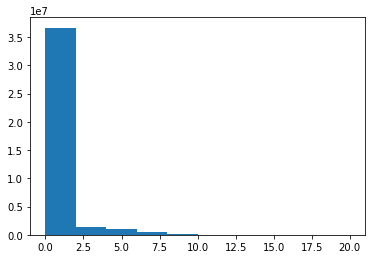

In [60]:
plt.hist(chla.flatten())

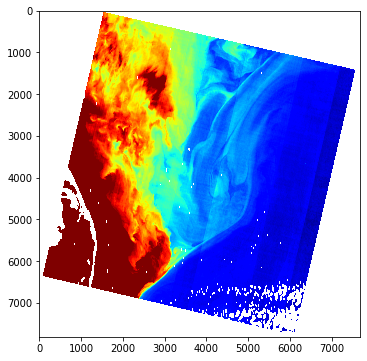

In [63]:
fig,ax=plt.subplots(figsize=(16,6))
ax.imshow(chla[0],vmin=0, vmax=1.5, cmap='jet')

In [82]:
cut_img = band3.values[0,4700:6500,1400:5900]/band2.values[0,4700:6500,1400:5900]
cut_img.shape

(1800, 4500)

In [90]:
np.nanmin(cut_img)

0.06257110352673492

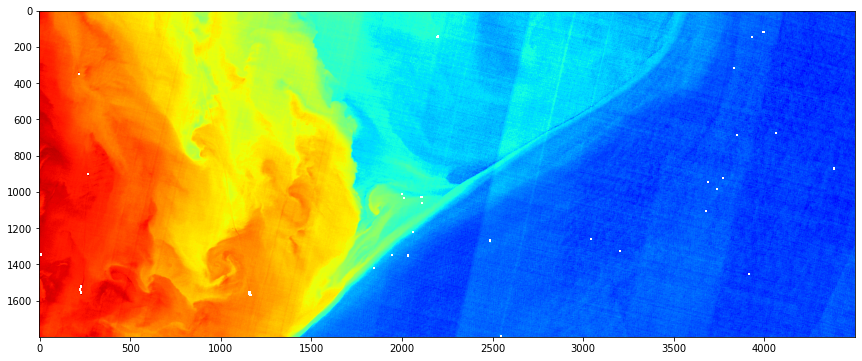

In [91]:
fig,ax=plt.subplots(figsize=(16,6))
ax.imshow(cut_img,vmin=0.0, vmax=1.3, cmap='jet')

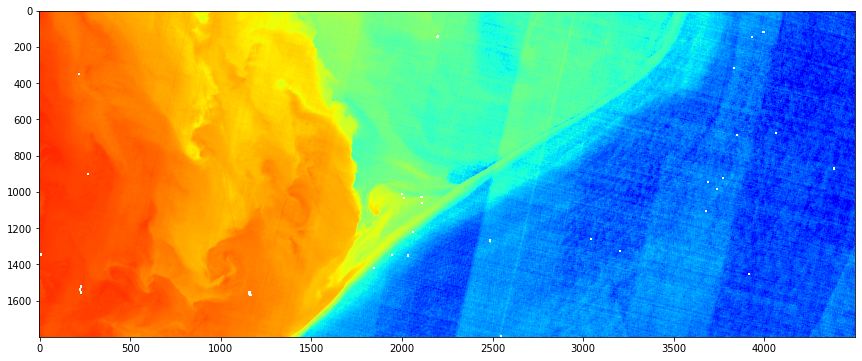

In [97]:
from matplotlib.colors import LogNorm
fig,ax=plt.subplots(figsize=(16,6))
ax.imshow(cut_img,norm=LogNorm(vmin=0.15, vmax=1.7), cmap='jet')

In [41]:

band1_cut = band1.isel(band=0,y=slice(2500,3500),x=slice(2000,4400))

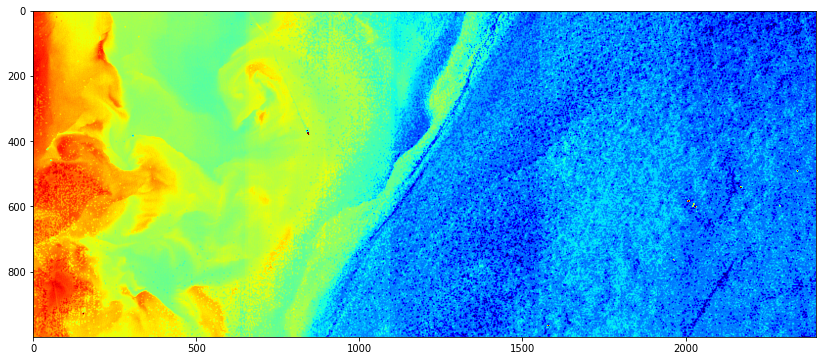

In [42]:
fig,ax=plt.subplots(figsize=(16,6))
ax.imshow(band1_cut.values,vmin=7350, vmax=8800, cmap='jet')

In [43]:
band1_cut.values.shape

(1000, 2400)

In [103]:

mask = np.isnan(cut_img)
cut_img[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), cut_img[~mask])

In [117]:
resampled_img = np.zeros(cut_img.shape)
resampled_img.shape

(1800, 4500)

In [118]:

4600/3

1533.3333333333333

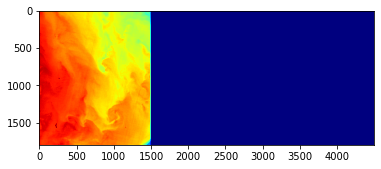

In [119]:
resampled_img[:,:1500] = cut_img[:,:1500]
plt.imshow(resampled_img,vmin=0, vmax=1.3, cmap='jet')

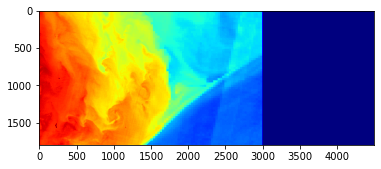

In [120]:
import skimage.measure
import cv2
new_array = skimage.measure.block_reduce(cut_img[:,1500:3000], (30,30), np.median)
res = cv2.resize(new_array, dsize=cut_img[:,1500:3000].T.shape, interpolation=cv2.INTER_AREA)
resampled_img[:,1500:3000] = res
plt.imshow(resampled_img,vmin=0, vmax=1.3, cmap='jet')

In [121]:

1800/300, 4500/300

(6.0, 15.0)

In [122]:

cut_img.shape

(1800, 4500)

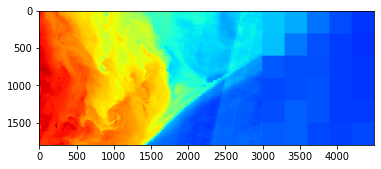

In [123]:
new_array = skimage.measure.block_reduce(cut_img[:,3000:4500], (300,300), np.median)
res = cv2.resize(new_array, dsize=cut_img[:,3000:4500].T.shape, interpolation=cv2.INTER_AREA)
resampled_img[:,3000:4500] = res
plt.imshow(resampled_img,vmin=0, vmax=1.3, cmap='jet')

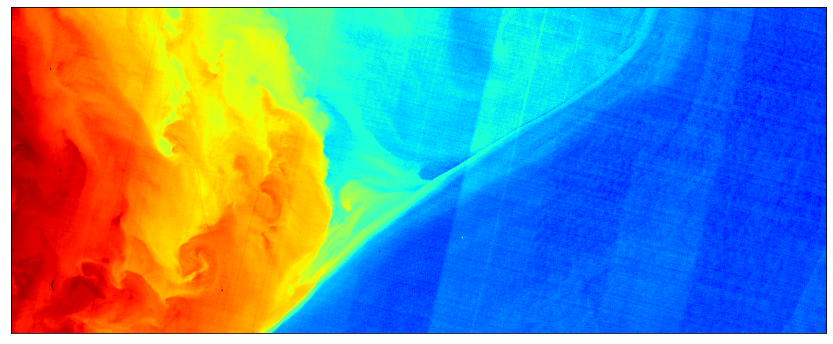

In [129]:
fig,ax=plt.subplots(figsize=(16,6))
ax.imshow(cut_img,vmin=0.0, vmax=1.25, cmap='jet')
# ax.axvline(1500,color='black')
# ax.axvline(3000,color='black')
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('landsat_aq_ref_front_img_notscaled.png',dpi=600)

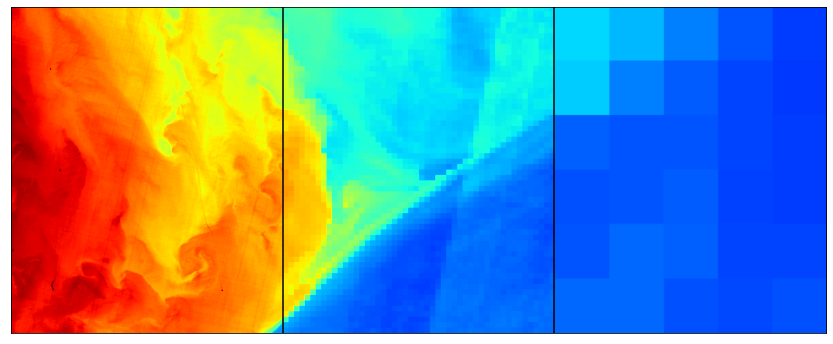

In [128]:
fig,ax=plt.subplots(figsize=(16,6))
ax.imshow(resampled_img,vmin=0.0, vmax=1.25, cmap='jet')
ax.axvline(1500,color='black')
ax.axvline(3000,color='black')
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('landsat_aq_ref_front_img_scaled.png',dpi=600)

In [70]:

30*20

600

(1000, 800)


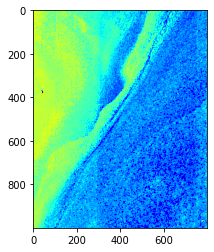

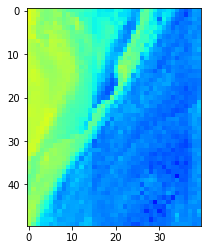

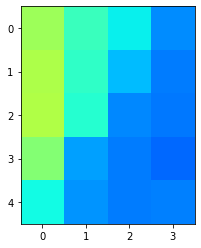

In [75]:
import numpy as np
import skimage.measure

your_array = band1_cut.values[:,800:1600]
print(your_array.shape)
plt.imshow(your_array, vmin=7350, vmax=8800, cmap='jet')
plt.show()
new_array = skimage.measure.block_reduce(your_array, (20,20), np.median)
plt.imshow(new_array, vmin=7350, vmax=8800, cmap='jet')
plt.show()
new_array = skimage.measure.block_reduce(your_array, (200,200), np.median)
plt.imshow(new_array, vmin=7350, vmax=8800, cmap='jet')
plt.show()

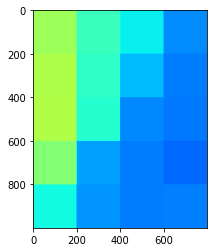

In [84]:
import cv2
import numpy as np

In [ ]:

resampled_img[:,8000:16000] = band1_cut.values[:,8000:1600]

In [ ]:
fig,ax=plt.subplots(figsize=(16,6))
band1_cut.plot(vmin=7000, vmax=9000, cmap='jet',ax=ax)

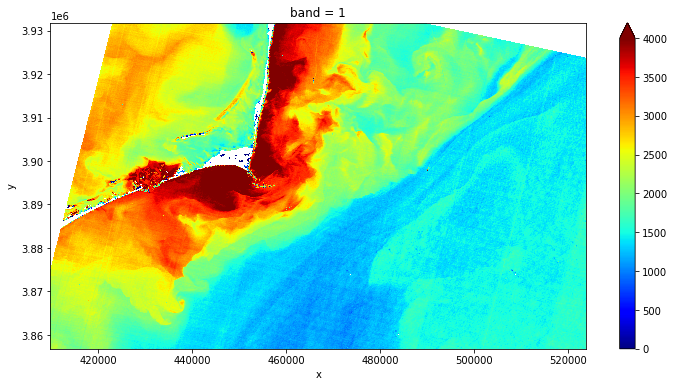

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
band1.plot(vmin=0, vmax=4000, cmap='jet',ax=ax)

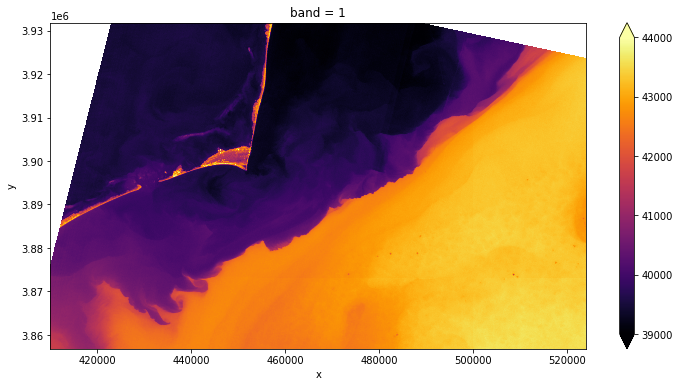

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
therm.plot(vmin=39000, vmax=44000, cmap='inferno',ax=ax)

Rescaling thermal band to TOA brightness temp using values from the metadata


In [ ]:
therm = (therm*0.0003342)+0.1

In [ ]:
therm

<xarray.DataArray (y: 2500, x: 3800)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [14.0237746, 14.0237746, 14.0247772, ..., 14.6667754, 14.6691148,
        14.6704516],
       [14.0267824, 14.026114 , 14.0267824, ..., 14.664436 , 14.666107 ,
        14.667778 ],
       [14.0291218, 14.0284534, 14.0284534, ..., 14.662765 , 14.6641018,
        14.6651044]])
Coordinates:
    band     int64 1
  * y        (y) float64 3.932e+06 3.932e+06 3.932e+06 ... 3.857e+06 3.857e+06
  * x        (x) float64 4.101e+05 4.101e+05 4.102e+05 ... 5.24e+05 5.241e+05

In [ ]:
# unsure if I need to do this solar angle calculation but it is accouting for sun elevation
# don't believe so...
import math
#therm = therm / np.sin(math.radians(45.21160346))

In [ ]:
# continued scaling from metadata
# K1_CONSTANT_BAND_10 = 774.8853
k1 = 774.8853
# K2_CONSTANT_BAND_10 = 1321.0789
k2 = 1321.0789
therm = k2 / np.log((k1 / therm) + 1)

In [ ]:
# keeping it in Kelvin degrees C is:
therm - 273.15

<xarray.DataArray (y: 2500, x: 3800)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [54.66952013, 54.66952013, 54.67523236, ..., 58.2896213 ,
        58.30263762, 58.31007503],
       [54.68665618, 54.68284833, 54.68665618, ..., 58.27660388,
        58.28590215, 58.29519986],
       [54.69998287, 54.69617536, 54.69617536, ..., 58.26730506,
        58.27474416, 58.28032326]])
Coordinates:
    band     int64 1
  * y        (y) float64 3.932e+06 3.932e+06 3.932e+06 ... 3.857e+06 3.857e+06
  * x        (x) float64 4.101e+05 4.101e+05 4.102e+05 ... 5.24e+05 5.241e+05

(array([1.675000e+03, 6.601630e+05, 3.800374e+06, 2.035899e+06,
        1.394307e+06, 5.959730e+05, 3.016050e+05, 9.649000e+03,
        1.140000e+02, 4.400000e+01]),
 array([   0. ,  628.3, 1256.6, 1884.9, 2513.2, 3141.5, 3769.8, 4398.1,
        5026.4, 5654.7, 6283. ]),
 <a list of 10 Patch objects>)

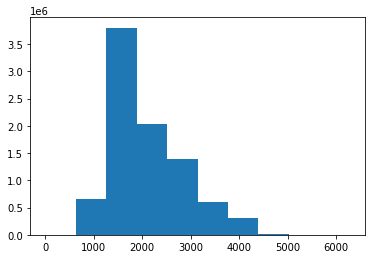

In [ ]:
plt.hist(np.array(band1).flatten())

(array([2.212634e+06, 1.619520e+06, 6.820710e+05, 2.512780e+05,
        2.089960e+05, 9.331060e+05, 1.973740e+06, 1.049780e+06,
        2.240000e+02, 1.100000e+01]),
 array([322.55775043, 323.7541691 , 324.95058777, 326.14700644,
        327.34342511, 328.53984378, 329.73626245, 330.93268112,
        332.12909979, 333.32551846, 334.52193713]),
 <a list of 10 Patch objects>)

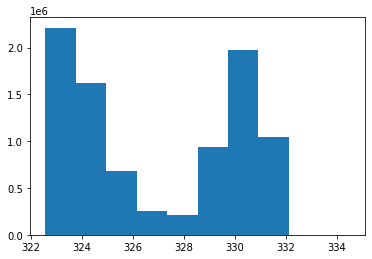

In [ ]:
plt.hist(np.array(therm).flatten())

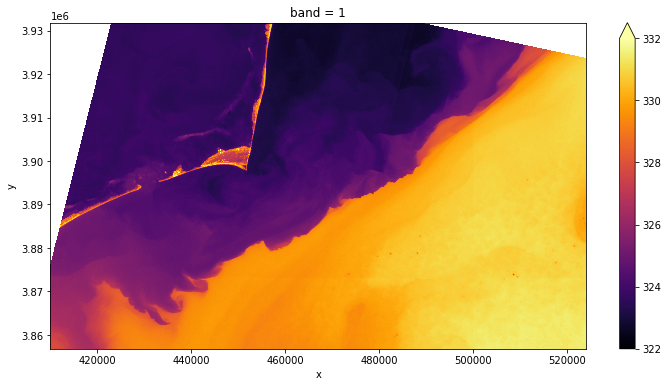

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
therm.plot(vmin=322, vmax=332, cmap='inferno',ax=ax)

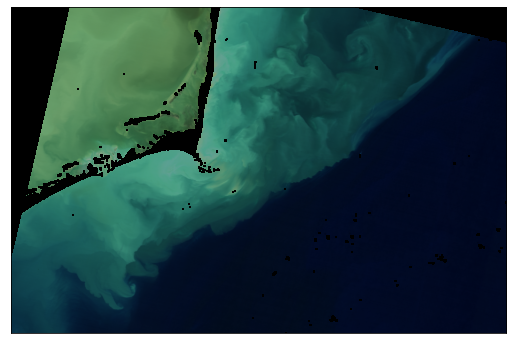

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
ax.imshow(np.array((band4.T,band3.T,band2.T)).T/10000)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('rgb_img.png',dpi=300)

Run the NASA chlorophyll algorithm using algorithm coefficients for L8 from https://oceancolor.gsfc.nasa.gov/atbd/chlor_a/


In [ ]:
# get the max blue band
mbr = np.maximum(band1, band2)
mbr.shape

(2500, 3800)

In [ ]:
# landsat 8 coefs
a0 = 0.2412
a1 = -2.0546
a2 = 1.1776
a3 = -0.5538
a4 = -0.4570


log10chl = a0 + a1 * (np.log10(mbr / band3)) \
    + a2 * (np.log10(mbr / band3))**2 \
        + a3 * (np.log10(mbr / band3))**3 \
            + a4 * (np.log10(mbr / band3))**4

oc3m = np.power(10, log10chl)

/usr/local/lib/python3.6/dist-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/usr/local/lib/python3.6/dist-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/usr/local/lib/python3.6/dist-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/usr/local/lib/python3.6/dist-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [ ]:
oc3m

<xarray.DataArray (y: 2500, x: 3800)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.86099308, 0.85626201, 0.85457658, ..., 0.16582573, 0.16943841,
        0.16258664],
       [0.86762766, 0.86262477, 0.8591536 , ..., 0.17234262, 0.17689166,
        0.16760315],
       [0.8683062 , 0.8624288 , 0.86098927, ..., 0.17344878, 0.17991719,
        0.17146281]])
Coordinates:
    band     int64 1
  * y        (y) float64 3.932e+06 3.932e+06 3.932e+06 ... 3.857e+06 3.857e+06
  * x        (x) float64 4.098e+05 4.098e+05 4.099e+05 ... 5.237e+05 5.238e+05

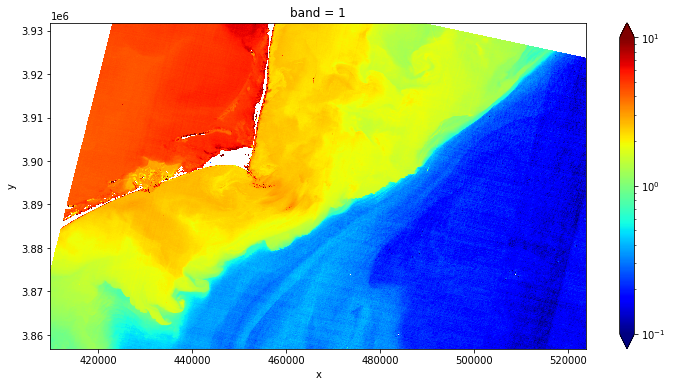

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
oc3m.plot(norm=LogNorm(vmin=0.1, vmax=10), cmap='jet',ax=ax)

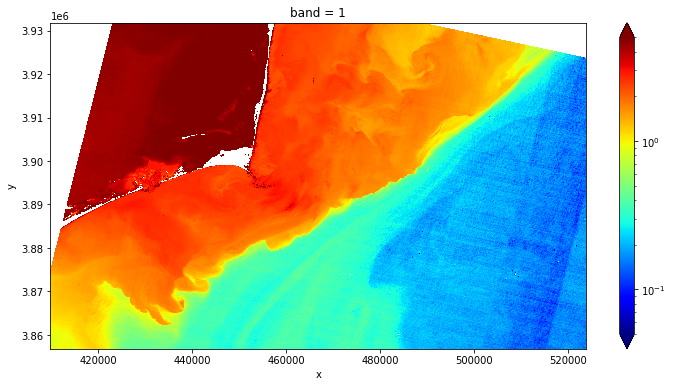

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
oc3m.plot(norm=LogNorm(vmin=0.05, vmax=5), cmap='jet',ax=ax)
fig.savefig('chla_wall.png',dpi=300)

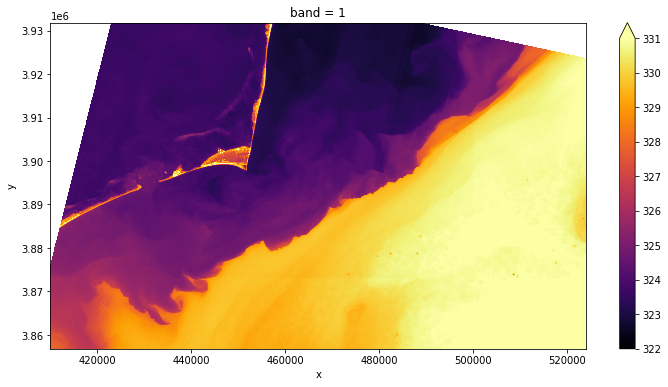

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
therm.plot(ax=ax, cmap='inferno',vmin=322, vmax=331)
fig.savefig('thermal_wall.png',dpi=300)

In [ ]:
oc3m.shape

(2500, 3800)

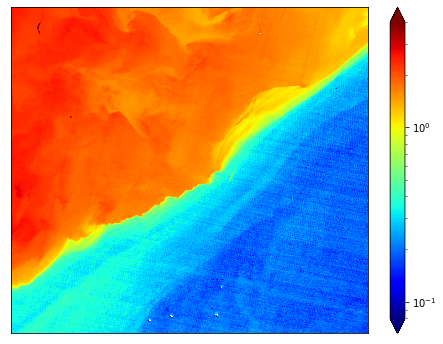

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
oc3m[350:1850,1750:3250].plot(norm=LogNorm(vmin=0.08, vmax=4), cmap='jet',ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
fig.savefig('chla_wall_zoom_gridless.png',dpi=300, transparent=True)

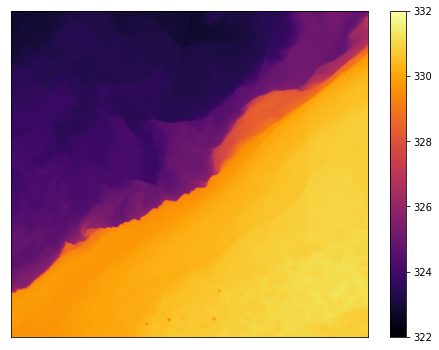

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
therm[350:1850,1750:3250].plot(ax=ax, cmap='inferno',vmin=322, vmax=332)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
fig.savefig('thermal_wall_zoom_gridless.png',dpi=300, transparent=True)